## Step-4 : Extract the Data

In [1]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import re

In [2]:
page = requests.get('https://www.flipkart.com/search?q=laptops&as=on&as-show=on&otracker=AS_Query_HistoryAutoSuggest_2_4_na_na_na&otracker1=AS_Query_HistoryAutoSuggest_2_4_na_na_na&as-pos=2&as-type=HISTORY&suggestionId=laptops&requestId=4e45ff6f-48a9-4ceb-bd0b-a4f569bdcc4a')

In [3]:
page.text

'<!doctype html><html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/atlas.chunk.8dd48d.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.c48a12.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.e4e719.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><link rel="shortcut icon" href="https:///www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipka

In [4]:
soup = BeautifulSoup(page.text)

In [5]:
soup

<!DOCTYPE html>
<html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/atlas.chunk.8dd48d.css" rel="stylesheet"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.c48a12.css" rel="stylesheet"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.e4e719.css" rel="stylesheet"/><meta content="text/html; charset=utf-8" http-equiv="Content-type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="102988293558" property="fb:page_id"/><meta content="658873552,624500995,100000233612389" property="fb:admins"/><link href="https:///www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/><link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/><meta content="website" property="og:type"/><meta content="Flipkart.com" name="og_site_name" property="og:sit

In [117]:
s = soup.find_all('div','KzDlHZ')

In [118]:
s

[<div class="KzDlHZ">CHUWI Intel Celeron Dual Core 11th Gen N4020 - (8 GB/256 GB SSD/Windows 11 Home) HeroBook Pro Laptop</div>,
 <div class="KzDlHZ">HP Victus Intel Core i5 12th Gen 12450H - (16 GB/1 TB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce...</div>,
 <div class="KzDlHZ">Lenovo IdeaPad Slim 5 WUXGA IPS AI PC Intel Core Ultra 5 125H - (16 GB/512 GB SSD/Windows 11 Home) 14I...</div>,
 <div class="KzDlHZ">Acer Aspire 3 Intel Core i7 12th Gen 1255U - (16 GB/512 GB SSD/Windows 11 Home) A324-51 Thin and Light...</div>,
 <div class="KzDlHZ">Lenovo LOQ AMD Ryzen 5 Quad Core 7235HS - (12 GB/512 GB SSD/Windows 11 Home/6 GB Graphics/NVIDIA GeFor...</div>,
 <div class="KzDlHZ">HP Omen AMD Ryzen 7 Octa Core 7840HS - (16 GB/1 TB SSD/Windows 11 Home/6 GB Graphics/NVIDIA GeForce RT...</div>,
 <div class="KzDlHZ">HP 255 G10 (2024) AMD Ryzen 3 Quad Core 7320U - (8 GB/512 GB SSD/Windows 11 Home) 250 G10 Thin and Lig...</div>,
 <div class="KzDlHZ">Acer Aspire 7 Intel Core i5 13th Gen 13420H - 

In [6]:
brand=[]
for i in  soup.find_all('div','KzDlHZ'):
    brand.append(i.text)

In [7]:
brand

['DELL Vostro 3520 Intel Core i3 12th Gen 1215U - (8 GB/512 GB SSD/Windows 11 Home) Vostro 3520 Thin and...',
 'HP Backlit Intel Core i5 12th Gen 1235U - (8 GB/512 GB SSD/Windows 11 Home) 15s-fy5002TU Thin and Ligh...',
 'Lenovo IdeaPad Slim 5 WUXGA IPS AI PC Intel Core Ultra 5 125H - (16 GB/512 GB SSD/Windows 11 Home) 14I...',
 'MSI Thin 15 Intel Core i7 12th Gen 12650H - (16 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeF...',
 'HP Touch Chromebook MediaTek MT8183 - (4 GB/32 GB EMMC Storage/Chrome OS) 11MK G9 Chromebook',
 'HP Omen AMD Ryzen 7 Octa Core 7840HS - (16 GB/1 TB SSD/Windows 11 Home/6 GB Graphics/NVIDIA GeForce RT...',
 'MSI Modern 14 Intel Core i5 12th Gen 1235U - (16 GB/512 GB SSD/Windows 11 Home) Modern 14 C12MO-1212IN...',
 'Lenovo LOQ Intel Core i7 13th Gen 13650HX - (24 GB/512 GB SSD/Windows 11 Home/8 GB Graphics/NVIDIA GeF...',
 'Acer Aspire 7 Intel Core i5 13th Gen 13420H - (16 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA G...',
 'HP 255 G10 (2024) AMD

In [8]:
rating = []
for i in soup.find_all('div','XQDdHH'):
    rating.append(i.text)


In [9]:
len(rating)

38

In [10]:
brand = []
rating =[]
price = []
ram = []
ssd = []


for i in soup.find_all('div','tUxRFH'):
    brand.append(i.find('div','KzDlHZ').text)
    rating_element = i.find('div', 'XQDdHH')
    if rating_element:
        rating.append(rating_element.text)
    else:
        rating.append(np.nan) 


    price.append(i.find('div','Nx9bqj _4b5DiR').text)
    
    p = i.find('ul','G4BRas').text

    regex = re.findall(r'\d+\sGB\s[A-z0-9]+\sRAM',p)
    if regex:
        ram.append(regex[0])
    else:
        ram.append(np.nan)

    regex = re.findall(r'\d+\sGB\sSSD',p)
    if regex :
        ssd.append(regex[0])
    else:
        ssd.append(np.nan)





In [11]:
print(len(brand ))
print(len(rating))
print(len(price ))
print(len(ram ))
print(len(ssd ))

24
24
24
24
24


In [12]:
brand

['DELL Vostro 3520 Intel Core i3 12th Gen 1215U - (8 GB/512 GB SSD/Windows 11 Home) Vostro 3520 Thin and...',
 'HP Backlit Intel Core i5 12th Gen 1235U - (8 GB/512 GB SSD/Windows 11 Home) 15s-fy5002TU Thin and Ligh...',
 'Lenovo IdeaPad Slim 5 WUXGA IPS AI PC Intel Core Ultra 5 125H - (16 GB/512 GB SSD/Windows 11 Home) 14I...',
 'MSI Thin 15 Intel Core i7 12th Gen 12650H - (16 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeF...',
 'HP Touch Chromebook MediaTek MT8183 - (4 GB/32 GB EMMC Storage/Chrome OS) 11MK G9 Chromebook',
 'HP Omen AMD Ryzen 7 Octa Core 7840HS - (16 GB/1 TB SSD/Windows 11 Home/6 GB Graphics/NVIDIA GeForce RT...',
 'MSI Modern 14 Intel Core i5 12th Gen 1235U - (16 GB/512 GB SSD/Windows 11 Home) Modern 14 C12MO-1212IN...',
 'Lenovo LOQ Intel Core i7 13th Gen 13650HX - (24 GB/512 GB SSD/Windows 11 Home/8 GB Graphics/NVIDIA GeF...',
 'Acer Aspire 7 Intel Core i5 13th Gen 13420H - (16 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA G...',
 'HP 255 G10 (2024) AMD

In [13]:
rating

['4.3',
 '4.2',
 '4.2',
 '4.1',
 '3.3',
 '4.5',
 '4.4',
 '4.3',
 '4.3',
 '4.2',
 '4.2',
 '4',
 '4.4',
 '4.3',
 '4.3',
 '4.2',
 nan,
 '4.7',
 '4.3',
 '4.3',
 '4',
 '4.3',
 '4.4',
 '4.2']

In [14]:
ram

['8 GB DDR4 RAM',
 '8 GB DDR4 RAM',
 '16 GB LPDDR5X RAM',
 '16 GB DDR4 RAM',
 '4 GB LPDDR4X RAM',
 '16 GB DDR5 RAM',
 '16 GB DDR4 RAM',
 '24 GB DDR5 RAM',
 '16 GB DDR4 RAM',
 '8 GB DDR4 RAM',
 '8 GB DDR4 RAM',
 '16 GB DDR5 RAM',
 '16 GB DDR4 RAM',
 '16 GB DDR4 RAM',
 '16 GB DDR4 RAM',
 '16 GB LPDDR5 RAM',
 '16 GB LPDDR5 RAM',
 '16 GB DDR5 RAM',
 '16 GB LPDDR5 RAM',
 '16 GB DDR4 RAM',
 '16 GB DDR4 RAM',
 '16 GB DDR4 RAM',
 '12 GB DDR5 RAM',
 '16 GB DDR4 RAM']

In [15]:
ssd

['512 GB SSD',
 '512 GB SSD',
 '512 GB SSD',
 '512 GB SSD',
 nan,
 nan,
 '512 GB SSD',
 '512 GB SSD',
 '512 GB SSD',
 '512 GB SSD',
 '512 GB SSD',
 nan,
 '512 GB SSD',
 '512 GB SSD',
 '512 GB SSD',
 nan,
 '512 GB SSD',
 nan,
 nan,
 '512 GB SSD',
 '512 GB SSD',
 '512 GB SSD',
 '512 GB SSD',
 '512 GB SSD']

In [16]:
pd.DataFrame({'Rating':rating,'Price':price,'SSD':ssd,'RAM':ram,'Brand':brand})

,Rating,Price,SSD,RAM,Brand
0,4.3,"₹34,990",512 GB SSD,8 GB DDR4 RAM,DELL Vostro 3520 Intel Core i3 12th Gen 1215U ...
1,4.2,"₹46,490",512 GB SSD,8 GB DDR4 RAM,HP Backlit Intel Core i5 12th Gen 1235U - (8 G...
2,4.2,"₹68,990",512 GB SSD,16 GB LPDDR5X RAM,Lenovo IdeaPad Slim 5 WUXGA IPS AI PC Intel Co...
3,4.1,"₹59,990",512 GB SSD,16 GB DDR4 RAM,MSI Thin 15 Intel Core i7 12th Gen 12650H - (1...
4,3.3,"₹10,990",NaN,4 GB LPDDR4X RAM,HP Touch Chromebook MediaTek MT8183 - (4 GB/32...
5,4.5,"₹99,990",NaN,16 GB DDR5 RAM,HP Omen AMD Ryzen 7 Octa Core 7840HS - (16 GB/...
6,4.4,"₹39,990",512 GB SSD,16 GB DDR4 RAM,MSI Modern 14 Intel Core i5 12th Gen 1235U - (...
7,4.3,"₹99,990",512 GB SSD,24 GB DDR5 RAM,Lenovo LOQ Intel Core i7 13th Gen 13650HX - (2...
8,4.3,"₹55,990",512 GB SSD,16 GB DDR4 RAM,Acer Aspire 7 Intel Core i5 13th Gen 13420H - ...
9,4.2,"₹25,990",512 GB SSD,8 GB DDR4 RAM,HP 255 G10 (2024) AMD Ryzen 3 Quad Core 7320U ...


In [17]:
brand = []
rating =[]
price = []
ram = []
ssd = []

for j in range(1,25):
    page = requests.get(f'https://www.flipkart.com/search?q=laptops&as=on&as-show=on&otracker=AS_Query_HistoryAutoSuggest_1_1_na_na_na&otracker1=AS_Query_HistoryAutoSuggest_1_1_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=laptops&requestId=a361fea1-5407-45f7-ae0c-cfdd5cd53a2e&as-searchtext=l&page={j}')
    soup = BeautifulSoup(page.text)
    for i in soup.find_all('div','tUxRFH'):
        brand.append(i.find('div','KzDlHZ').text)
        rating_element = i.find('div', 'XQDdHH')
        if rating_element:
            rating.append(rating_element.text)
        else:
            rating.append(np.nan) 
        price.append(i.find('div','Nx9bqj _4b5DiR').text)
        
        p = i.find('ul','G4BRas').text
    
        regex = re.findall(r'\d+\sGB\s[A-z0-9]+\sRAM',p)
        if regex:
            ram.append(regex[0])
        else:
            ram.append(np.nan)
    
        regex = re.findall(r'\d+\sGB\sSSD',p)
        if regex :
            ssd.append(regex[0])
        else:
            ssd.append(np.nan)
        

In [18]:
print(len(brand ))
print(len(rating))
print(len(price ))
print(len(ram ))
print(len(ssd ))

480
480
480
480
480


## Step-5 : Create a Data Frame

In [19]:
df = pd.DataFrame({'Brand':brand,'Rating':rating,'Price':price,'SSD':ssd,'RAM':ram})

## Step-6 : Export into .csv format 

In [20]:
df.to_csv('Laptops.csv')

## Step-7 : Read CSV File 

In [21]:
pd.read_csv('Laptops.csv')

,Unnamed: 0,Brand,Rating,Price,SSD,RAM
0,0,DELL Vostro 3520 Intel Core i3 12th Gen 1215U ...,4.3,"₹34,990",512 GB SSD,8 GB DDR4 RAM
1,1,HP Backlit Intel Core i5 12th Gen 1235U - (8 G...,4.2,"₹46,490",512 GB SSD,8 GB DDR4 RAM
2,2,Lenovo IdeaPad Slim 5 WUXGA IPS AI PC Intel Co...,4.2,"₹68,990",512 GB SSD,16 GB LPDDR5X RAM
3,3,MSI Thin 15 Intel Core i7 12th Gen 12650H - (1...,4.1,"₹59,990",512 GB SSD,16 GB DDR4 RAM
4,4,HP Touch Chromebook MediaTek MT8183 - (4 GB/32...,3.3,"₹10,990",NaN,4 GB LPDDR4X RAM
...,...,...,...,...,...,...
475,475,HP OMEN Intel Core i9 13th Gen 13900HX - (16 G...,4.7,"₹1,45,990",NaN,16 GB DDR5 RAM
476,476,HP Pavilion x360 Intel Core i7 13th Gen - (16 ...,3.7,"₹89,999",512 GB SSD,16 GB DDR4 RAM
477,477,"ASUS Vivobook S 15 OLED Powered, Intel EVO H S...",4.2,"₹96,990",NaN,16 GB LPDDR5X RAM
478,478,ASUS Vivobook S14 OLED Intel EVO H-Series Inte...,4.4,"₹69,990",512 GB SSD,16 GB DDR4 RAM


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Brand   480 non-null    object
 1   Rating  435 non-null    object
 2   Price   480 non-null    object
 3   SSD     352 non-null    object
 4   RAM     462 non-null    object
dtypes: object(5)
memory usage: 18.9+ KB


In [23]:
df.isnull().sum()

Brand       0
Rating     45
Price       0
SSD       128
RAM        18
dtype: int64

## Step-8 : Clean the Data 

In [24]:
df['Brand_names'] = df['Brand'].apply(lambda x:re.findall(r'^\w+',x)[0])

In [25]:
df['Brand_names']

0        DELL
1          HP
2      Lenovo
3         MSI
4          HP
        ...  
475        HP
476        HP
477      ASUS
478      ASUS
479      DELL
Name: Brand_names, Length: 480, dtype: object

In [28]:
df['Model'] = df['Brand'].apply(lambda x:re.findall(r'^\w+([A-Za-z0-9\s\-\(\)]+)',x)[0])

In [26]:
df['Model'] = df['Brand'].apply(lambda x:re.findall(r'^\w+(.*?)\s(?:Intel|AMD)',x))
for i in range(len(df['Model'])):
    if len(df['Model'][i]) > 0:
        df['Model'][i] = df['Model'][i][0]
    else:
        df['Model'][i] = np.nan
     

C:\Users\MYPC\AppData\Local\Temp\ipykernel_10636\489869907.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Model'][i] = df['Model'][i][0]
C:\Users\MYPC\AppData\Local\Temp\ipykernel_10636\489869907.py:4: FutureWarning: ChainedAssignme

In [27]:
df['Model']

0                          Vostro 3520
1                              Backlit
2       IdeaPad Slim 5 WUXGA IPS AI PC
3                              Thin 15
4                                  NaN
                    ...               
475                               OMEN
476                      Pavilion x360
477        Vivobook S 15 OLED Powered,
478                  Vivobook S14 OLED
479                      Inspiron 3530
Name: Model, Length: 480, dtype: object

In [28]:
df.head()

,Brand,Rating,Price,SSD,RAM,Brand_names,Model
0,DELL Vostro 3520 Intel Core i3 12th Gen 1215U ...,4.3,"₹34,990",512 GB SSD,8 GB DDR4 RAM,DELL,Vostro 3520
1,HP Backlit Intel Core i5 12th Gen 1235U - (8 G...,4.2,"₹46,490",512 GB SSD,8 GB DDR4 RAM,HP,Backlit
2,Lenovo IdeaPad Slim 5 WUXGA IPS AI PC Intel Co...,4.2,"₹68,990",512 GB SSD,16 GB LPDDR5X RAM,Lenovo,IdeaPad Slim 5 WUXGA IPS AI PC
3,MSI Thin 15 Intel Core i7 12th Gen 12650H - (1...,4.1,"₹59,990",512 GB SSD,16 GB DDR4 RAM,MSI,Thin 15
4,HP Touch Chromebook MediaTek MT8183 - (4 GB/32...,3.3,"₹10,990",NaN,4 GB LPDDR4X RAM,HP,NaN


In [29]:
df['Processor'] = df["Brand"].apply(lambda x: re.findall(r'(?i)(?:Intel|AMD)\s(?:Core|Celeron|Ryzen)\s(?:[i3i5i7]+|\d+\s?[A-Za-z]*)',x))
for i in range(len(df['Processor'])):
    if len(df['Processor'][i]) > 0:
        df['Processor'][i] = df['Processor'][i][0] 
    else:
        df['Processor'][i] = np.nan


C:\Users\MYPC\AppData\Local\Temp\ipykernel_10636\3257458415.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Processor'][i] = df['Processor'][i][0]
C:\Users\MYPC\AppData\Local\Temp\ipykernel_10636\3257458415.py:4: FutureWarning: Chain

In [30]:
df['Processor']

0      Intel Core i3
1      Intel Core i5
2                NaN
3      Intel Core i7
4                NaN
           ...      
475     Intel Core i
476    Intel Core i7
477              NaN
478    Intel Core i5
479    Intel Core i3
Name: Processor, Length: 480, dtype: object

In [31]:
df

,Brand,Rating,Price,SSD,RAM,Brand_names,Model,Processor
0,DELL Vostro 3520 Intel Core i3 12th Gen 1215U ...,4.3,"₹34,990",512 GB SSD,8 GB DDR4 RAM,DELL,Vostro 3520,Intel Core i3
1,HP Backlit Intel Core i5 12th Gen 1235U - (8 G...,4.2,"₹46,490",512 GB SSD,8 GB DDR4 RAM,HP,Backlit,Intel Core i5
2,Lenovo IdeaPad Slim 5 WUXGA IPS AI PC Intel Co...,4.2,"₹68,990",512 GB SSD,16 GB LPDDR5X RAM,Lenovo,IdeaPad Slim 5 WUXGA IPS AI PC,NaN
3,MSI Thin 15 Intel Core i7 12th Gen 12650H - (1...,4.1,"₹59,990",512 GB SSD,16 GB DDR4 RAM,MSI,Thin 15,Intel Core i7
4,HP Touch Chromebook MediaTek MT8183 - (4 GB/32...,3.3,"₹10,990",NaN,4 GB LPDDR4X RAM,HP,NaN,NaN
...,...,...,...,...,...,...,...,...
475,HP OMEN Intel Core i9 13th Gen 13900HX - (16 G...,4.7,"₹1,45,990",NaN,16 GB DDR5 RAM,HP,OMEN,Intel Core i
476,HP Pavilion x360 Intel Core i7 13th Gen - (16 ...,3.7,"₹89,999",512 GB SSD,16 GB DDR4 RAM,HP,Pavilion x360,Intel Core i7
477,"ASUS Vivobook S 15 OLED Powered, Intel EVO H S...",4.2,"₹96,990",NaN,16 GB LPDDR5X RAM,ASUS,"Vivobook S 15 OLED Powered,",NaN
478,ASUS Vivobook S14 OLED Intel EVO H-Series Inte...,4.4,"₹69,990",512 GB SSD,16 GB DDR4 RAM,ASUS,Vivobook S14 OLED,Intel Core i5


In [32]:
df['Generation'] = df['Brand'].apply(lambda x: re.findall(r'(\d{2})th',x))
for i in range(len(df['Generation'])):
    if len(df['Generation'][i]) > 0 :
        df['Generation'][i] = df['Generation'][i][0]
    else:
        df['Generation'][i] = np.nan

C:\Users\MYPC\AppData\Local\Temp\ipykernel_10636\3640298574.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Generation'][i] = df['Generation'][i][0]
C:\Users\MYPC\AppData\Local\Temp\ipykernel_10636\3640298574.py:4: FutureWarning: Cha

In [33]:
df['Generation'].isnull().sum()

181

In [34]:
df['Generation']

0       12
1       12
2      NaN
3       12
4      NaN
      ... 
475     13
476     13
477    NaN
478     12
479     13
Name: Generation, Length: 480, dtype: object

In [35]:
df['Windows'] = df['Brand'].apply(lambda x : re.findall(r'Windows\s\d+\s',x))
for i in range(len(df['Windows'])):
    if len(df['Windows'][i]) > 0:
        df['Windows'][i] = df['Windows'][i][0]
    else:
        df['Windows'][i] = np.nan


C:\Users\MYPC\AppData\Local\Temp\ipykernel_10636\1880284498.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Windows'][i] = df['Windows'][i][0]
C:\Users\MYPC\AppData\Local\Temp\ipykernel_10636\1880284498.py:4: FutureWarning: ChainedAs

In [36]:
df['Windows']

0      Windows 11 
1      Windows 11 
2      Windows 11 
3      Windows 11 
4              NaN
          ...     
475    Windows 11 
476    Windows 11 
477            NaN
478            NaN
479    Windows 11 
Name: Windows, Length: 480, dtype: object

In [37]:
df['Model_num'] = df['Brand'].apply(lambda x : re.findall('\s\d+[A-Z]+\s',x))
for i in range(len(df['Model_num'])):
    if len(df['Model_num'][i]) > 0:
        df['Model_num'][i] = df['Model_num'][i][0]
    else:
        df['Model_num'][i] = np.nan

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\MYPC\AppData\Local\Temp\ipykernel_10636\816090962.py:1: SyntaxWarning: invalid escape sequence '\s'
  df['Model_num'] = df['Brand'].apply(lambda x : re.findall('\s\d+[A-Z]+\s',x))
C:\Users\MYPC\AppData\Local\Temp\ipykernel_10636\816090962.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the

In [38]:
df['Model_num'].isnull().sum()

65

In [39]:
df

,Brand,Rating,Price,SSD,RAM,Brand_names,Model,Processor,Generation,Windows,Model_num
0,DELL Vostro 3520 Intel Core i3 12th Gen 1215U ...,4.3,"₹34,990",512 GB SSD,8 GB DDR4 RAM,DELL,Vostro 3520,Intel Core i3,12,Windows 11,1215U
1,HP Backlit Intel Core i5 12th Gen 1235U - (8 G...,4.2,"₹46,490",512 GB SSD,8 GB DDR4 RAM,HP,Backlit,Intel Core i5,12,Windows 11,1235U
2,Lenovo IdeaPad Slim 5 WUXGA IPS AI PC Intel Co...,4.2,"₹68,990",512 GB SSD,16 GB LPDDR5X RAM,Lenovo,IdeaPad Slim 5 WUXGA IPS AI PC,NaN,NaN,Windows 11,125H
3,MSI Thin 15 Intel Core i7 12th Gen 12650H - (1...,4.1,"₹59,990",512 GB SSD,16 GB DDR4 RAM,MSI,Thin 15,Intel Core i7,12,Windows 11,12650H
4,HP Touch Chromebook MediaTek MT8183 - (4 GB/32...,3.3,"₹10,990",NaN,4 GB LPDDR4X RAM,HP,NaN,NaN,NaN,NaN,11MK
...,...,...,...,...,...,...,...,...,...,...,...
475,HP OMEN Intel Core i9 13th Gen 13900HX - (16 G...,4.7,"₹1,45,990",NaN,16 GB DDR5 RAM,HP,OMEN,Intel Core i,13,Windows 11,13900HX
476,HP Pavilion x360 Intel Core i7 13th Gen - (16 ...,3.7,"₹89,999",512 GB SSD,16 GB DDR4 RAM,HP,Pavilion x360,Intel Core i7,13,Windows 11,NaN
477,"ASUS Vivobook S 15 OLED Powered, Intel EVO H S...",4.2,"₹96,990",NaN,16 GB LPDDR5X RAM,ASUS,"Vivobook S 15 OLED Powered,",NaN,NaN,NaN,155H
478,ASUS Vivobook S14 OLED Intel EVO H-Series Inte...,4.4,"₹69,990",512 GB SSD,16 GB DDR4 RAM,ASUS,Vivobook S14 OLED,Intel Core i5,12,NaN,12500H


In [40]:
df.drop(columns = ['Brand'],inplace=True)

In [41]:
df = df.reindex(columns=['Brand_names', 'Model', 'Processor', 'Generation', 'Windows', 'Model_num', 'RAM', 'SSD', 'Price', 'Rating'], fill_value=False)


In [42]:
df

,Brand_names,Model,Processor,Generation,Windows,Model_num,RAM,SSD,Price,Rating
0,DELL,Vostro 3520,Intel Core i3,12,Windows 11,1215U,8 GB DDR4 RAM,512 GB SSD,"₹34,990",4.3
1,HP,Backlit,Intel Core i5,12,Windows 11,1235U,8 GB DDR4 RAM,512 GB SSD,"₹46,490",4.2
2,Lenovo,IdeaPad Slim 5 WUXGA IPS AI PC,NaN,NaN,Windows 11,125H,16 GB LPDDR5X RAM,512 GB SSD,"₹68,990",4.2
3,MSI,Thin 15,Intel Core i7,12,Windows 11,12650H,16 GB DDR4 RAM,512 GB SSD,"₹59,990",4.1
4,HP,NaN,NaN,NaN,NaN,11MK,4 GB LPDDR4X RAM,NaN,"₹10,990",3.3
...,...,...,...,...,...,...,...,...,...,...
475,HP,OMEN,Intel Core i,13,Windows 11,13900HX,16 GB DDR5 RAM,NaN,"₹1,45,990",4.7
476,HP,Pavilion x360,Intel Core i7,13,Windows 11,NaN,16 GB DDR4 RAM,512 GB SSD,"₹89,999",3.7
477,ASUS,"Vivobook S 15 OLED Powered,",NaN,NaN,NaN,155H,16 GB LPDDR5X RAM,NaN,"₹96,990",4.2
478,ASUS,Vivobook S14 OLED,Intel Core i5,12,NaN,12500H,16 GB DDR4 RAM,512 GB SSD,"₹69,990",4.4


In [43]:
df['Model'] = df['Model'].replace('',np.nan)

In [44]:
df['Model'] 

0                          Vostro 3520
1                              Backlit
2       IdeaPad Slim 5 WUXGA IPS AI PC
3                              Thin 15
4                                  NaN
                    ...               
475                               OMEN
476                      Pavilion x360
477        Vivobook S 15 OLED Powered,
478                  Vivobook S14 OLED
479                      Inspiron 3530
Name: Model, Length: 480, dtype: object

In [45]:
df['RAM'] = df['RAM'].dropna().astype(str).str.extract(r'(\d+\s)')
#df['RAM'] = df['RAM'].str.replace(r'\s[DDR4|LPDDR5X|LPDDR4|DDR5]+\sRAM','', regex=True)


In [46]:
df['RAM']

0       8 
1       8 
2      16 
3      16 
4       4 
      ... 
475    16 
476    16 
477    16 
478    16 
479     8 
Name: RAM, Length: 480, dtype: object

In [47]:
df['SSD'] = df['SSD'].str.replace('GB SSD','')

In [48]:
df['SSD']

0      512 
1      512 
2      512 
3      512 
4       NaN
       ... 
475     NaN
476    512 
477     NaN
478    512 
479    512 
Name: SSD, Length: 480, dtype: object

In [49]:
df['Price'] = df['Price'].str.replace('₹','').str.replace(',','')

In [50]:
df['Price']

0       34990
1       46490
2       68990
3       59990
4       10990
        ...  
475    145990
476     89999
477     96990
478     69990
479     39490
Name: Price, Length: 480, dtype: object

In [51]:
df

,Brand_names,Model,Processor,Generation,Windows,Model_num,RAM,SSD,Price,Rating
0,DELL,Vostro 3520,Intel Core i3,12,Windows 11,1215U,8,512,34990,4.3
1,HP,Backlit,Intel Core i5,12,Windows 11,1235U,8,512,46490,4.2
2,Lenovo,IdeaPad Slim 5 WUXGA IPS AI PC,NaN,NaN,Windows 11,125H,16,512,68990,4.2
3,MSI,Thin 15,Intel Core i7,12,Windows 11,12650H,16,512,59990,4.1
4,HP,NaN,NaN,NaN,NaN,11MK,4,NaN,10990,3.3
...,...,...,...,...,...,...,...,...,...,...
475,HP,OMEN,Intel Core i,13,Windows 11,13900HX,16,NaN,145990,4.7
476,HP,Pavilion x360,Intel Core i7,13,Windows 11,NaN,16,512,89999,3.7
477,ASUS,"Vivobook S 15 OLED Powered,",NaN,NaN,NaN,155H,16,NaN,96990,4.2
478,ASUS,Vivobook S14 OLED,Intel Core i5,12,NaN,12500H,16,512,69990,4.4


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand_names  480 non-null    object
 1   Model        392 non-null    object
 2   Processor    418 non-null    object
 3   Generation   299 non-null    object
 4   Windows      434 non-null    object
 5   Model_num    415 non-null    object
 6   RAM          462 non-null    object
 7   SSD          352 non-null    object
 8   Price        480 non-null    object
 9   Rating       435 non-null    object
dtypes: object(10)
memory usage: 37.6+ KB


In [53]:
df['Generation'] = df['Generation'].astype(float)

In [54]:
df['Generation'] = df['Generation'].fillna(method='ffill').astype(int)

C:\Users\MYPC\AppData\Local\Temp\ipykernel_10636\1746715093.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Generation'] = df['Generation'].fillna(method='ffill').astype(int)


In [55]:
df['Generation']

0      12
1      12
2      12
3      12
4      12
       ..
475    13
476    13
477    13
478    12
479    13
Name: Generation, Length: 480, dtype: int32

In [56]:
df['RAM'] = df['RAM'].astype(float)

In [57]:
df['RAM']

0       8.0
1       8.0
2      16.0
3      16.0
4       4.0
       ... 
475    16.0
476    16.0
477    16.0
478    16.0
479     8.0
Name: RAM, Length: 480, dtype: float64

In [58]:
df['SSD'] = df['SSD'].astype(float)

In [59]:
df['SSD']

0      512.0
1      512.0
2      512.0
3      512.0
4        NaN
       ...  
475      NaN
476    512.0
477      NaN
478    512.0
479    512.0
Name: SSD, Length: 480, dtype: float64

In [60]:
df['Price'] = df['Price'].astype(float)

In [61]:
df['Price']

0       34990.0
1       46490.0
2       68990.0
3       59990.0
4       10990.0
         ...   
475    145990.0
476     89999.0
477     96990.0
478     69990.0
479     39490.0
Name: Price, Length: 480, dtype: float64

In [62]:
df['Rating'] = df['Rating'].astype(float)

In [63]:
df['Rating']

0      4.3
1      4.2
2      4.2
3      4.1
4      3.3
      ... 
475    4.7
476    3.7
477    4.2
478    4.4
479    NaN
Name: Rating, Length: 480, dtype: float64

In [64]:
df.groupby(['Brand_names','RAM'])['Price'].mean()

Brand_names  RAM 
ASUS         4.0      18240.000000
             8.0      37763.136364
             16.0     77749.083333
             32.0    144990.000000
Acer         8.0      30886.363636
             16.0     54467.058824
CHUWI        8.0      21990.000000
             12.0     37990.000000
DELL         4.0      18410.000000
             8.0      37533.108696
             16.0     71220.000000
GIGABYTE     16.0     74990.000000
HP           4.0      16490.000000
             8.0      40087.227273
             16.0     87938.038961
             32.0     82990.000000
Infinix      16.0     64147.000000
             32.0     71990.000000
Lenovo       4.0      13990.000000
             8.0      28999.125000
             12.0     71056.666667
             16.0     63931.357143
             24.0     94990.000000
             32.0    102990.000000
MSI          8.0      42623.000000
             16.0     68109.380952
             32.0    169990.000000
Primebook    4.0      12990.000000
SA

In [65]:
df.groupby(['Brand_names','RAM'])['Price'].transform('mean')

0      37533.108696
1      40087.227273
2      63931.357143
3      68109.380952
4      16490.000000
           ...     
475    87938.038961
476    87938.038961
477    77749.083333
478    77749.083333
479    37533.108696
Name: Price, Length: 480, dtype: float64

In [66]:
df['Price'] = df['Price'].fillna(df.groupby(['Brand_names','RAM'])['Price'].transform('mean'))

In [67]:
df['Price'] = df['Price'].astype(int)

In [68]:
df['Price']

0       34990
1       46490
2       68990
3       59990
4       10990
        ...  
475    145990
476     89999
477     96990
478     69990
479     39490
Name: Price, Length: 480, dtype: int32

In [69]:
cl = [col for col in df if df[col].dtype !='O' and df[col].isnull().any()]
cl

['RAM', 'SSD', 'Rating']

In [70]:
for c in cl:
    df[c].fillna(df[c].mean(),inplace=True)

C:\Users\MYPC\AppData\Local\Temp\ipykernel_10636\2951971490.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna(df[c].mean(),inplace=True)


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand_names  480 non-null    object 
 1   Model        392 non-null    object 
 2   Processor    418 non-null    object 
 3   Generation   480 non-null    int32  
 4   Windows      434 non-null    object 
 5   Model_num    415 non-null    object 
 6   RAM          480 non-null    float64
 7   SSD          480 non-null    float64
 8   Price        480 non-null    int32  
 9   Rating       480 non-null    float64
dtypes: float64(3), int32(2), object(5)
memory usage: 33.9+ KB


In [72]:
df['RAM'] = df['RAM'].astype(int)

In [73]:
df['SSD'] = df['SSD'].astype(int)

In [74]:
df.isnull().sum()

Brand_names     0
Model          88
Processor      62
Generation      0
Windows        46
Model_num      65
RAM             0
SSD             0
Price           0
Rating          0
dtype: int64

In [75]:
cl = [col for col in df if df[col].dtype =='O' and df[col].isnull().any()]
cl

['Model', 'Processor', 'Windows', 'Model_num']

In [76]:
df

,Brand_names,Model,Processor,Generation,Windows,Model_num,RAM,SSD,Price,Rating
0,DELL,Vostro 3520,Intel Core i3,12,Windows 11,1215U,8,512,34990,4.300000
1,HP,Backlit,Intel Core i5,12,Windows 11,1235U,8,512,46490,4.200000
2,Lenovo,IdeaPad Slim 5 WUXGA IPS AI PC,NaN,12,Windows 11,125H,16,512,68990,4.200000
3,MSI,Thin 15,Intel Core i7,12,Windows 11,12650H,16,512,59990,4.100000
4,HP,NaN,NaN,12,NaN,11MK,4,494,10990,3.300000
...,...,...,...,...,...,...,...,...,...,...
475,HP,OMEN,Intel Core i,13,Windows 11,13900HX,16,494,145990,4.700000
476,HP,Pavilion x360,Intel Core i7,13,Windows 11,NaN,16,512,89999,3.700000
477,ASUS,"Vivobook S 15 OLED Powered,",NaN,13,NaN,155H,16,494,96990,4.200000
478,ASUS,Vivobook S14 OLED,Intel Core i5,12,NaN,12500H,16,512,69990,4.400000


In [77]:
for c in cl:
    df[c] = df[c].fillna(df[c].mode()[0])


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand_names  480 non-null    object 
 1   Model        480 non-null    object 
 2   Processor    480 non-null    object 
 3   Generation   480 non-null    int32  
 4   Windows      480 non-null    object 
 5   Model_num    480 non-null    object 
 6   RAM          480 non-null    int32  
 7   SSD          480 non-null    int32  
 8   Price        480 non-null    int32  
 9   Rating       480 non-null    float64
dtypes: float64(1), int32(4), object(5)
memory usage: 30.1+ KB


In [79]:
df.isnull().sum()

Brand_names    0
Model          0
Processor      0
Generation     0
Windows        0
Model_num      0
RAM            0
SSD            0
Price          0
Rating         0
dtype: int64

In [88]:
df

,Unnamed: 0,Brand_names,Model,Processor,Generation,Windows,Model_num,RAM,SSD,Price,Rating
0,0,DELL,Vostro 3520,Intel Core i3,12,Windows 11,1215U,8,512,34990,4.300000
1,1,HP,Backlit,Intel Core i5,12,Windows 11,1235U,8,512,46490,4.200000
2,2,Lenovo,IdeaPad Slim 5 WUXGA IPS AI PC,Intel Core i5,12,Windows 11,125H,16,512,68990,4.200000
3,3,MSI,Thin 15,Intel Core i7,12,Windows 11,12650H,16,512,59990,4.100000
4,4,HP,OMEN,Intel Core i5,12,Windows 11,11MK,4,494,10990,3.300000
...,...,...,...,...,...,...,...,...,...,...,...
475,475,HP,OMEN,Intel Core i,13,Windows 11,13900HX,16,494,145990,4.700000
476,476,HP,Pavilion x360,Intel Core i7,13,Windows 11,1215U,16,512,89999,3.700000
477,477,ASUS,"Vivobook S 15 OLED Powered,",Intel Core i5,13,Windows 11,155H,16,494,96990,4.200000
478,478,ASUS,Vivobook S14 OLED,Intel Core i5,12,Windows 11,12500H,16,512,69990,4.400000


In [84]:
df1 = df.to_csv('LaptopsPrice.csv')

In [85]:
df1 = pd.read_csv('LaptopsPrice.csv')

In [111]:
df1

,Brand_names,Model,Processor,Generation,Windows,Model_num,RAM,SSD,Price,Rating
0,DELL,Vostro 3520,Intel Core i3,12,Windows 11,1215U,8,512,34990,4.3
1,HP,Backlit,Intel Core i5,12,Windows 11,1235U,8,512,46490,4.2
2,Lenovo,IdeaPad Slim 5 WUXGA IPS AI PC,Intel Core i5,12,Windows 11,125H,16,512,68990,4.2
3,MSI,Thin 15,Intel Core i7,12,Windows 11,12650H,16,512,59990,4.1
4,HP,OMEN,Intel Core i5,12,Windows 11,11MK,4,494,10990,3.3
...,...,...,...,...,...,...,...,...,...,...
475,HP,OMEN,Intel Core i,13,Windows 11,13900HX,16,494,145990,4.7
476,HP,Pavilion x360,Intel Core i7,13,Windows 11,1215U,16,512,89999,3.7
477,ASUS,"Vivobook S 15 OLED Powered,",Intel Core i5,13,Windows 11,155H,16,494,96990,4.2
478,ASUS,Vivobook S14 OLED,Intel Core i5,12,Windows 11,12500H,16,512,69990,4.4


In [96]:
df1['Rating'] = df1['Rating'].round(1)

In [97]:
df1['Rating']

0      4.3
1      4.2
2      4.2
3      4.1
4      3.3
      ... 
475    4.7
476    3.7
477    4.2
478    4.4
479    4.2
Name: Rating, Length: 480, dtype: float64

## Step - 9 : Data Analysis and Visualization (EDA)

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Univariate analysis : Numerical analysis

In [133]:
mean_price = df1['Price'].mean() 
median_price = df1['Price'].median()  
mode_price = df1['Price'].mode()[0]  
std_dev = df1['Price'].std() 
variance = df1['Price'].var()  


print(f"Mean: {mean_price}")
print(f"Median: {median_price}")
print(f"Mode: {mode_price}")
print(f"Standard Deviation: {std_dev}")
print(f"Variance: {variance}")



Mean: 67328.96041666667
Median: 53990.0
Mode: 34990
Standard Deviation: 42544.02117836969
Variance: 1809993738.0255687


<Figure size 800x500 with 0 Axes>

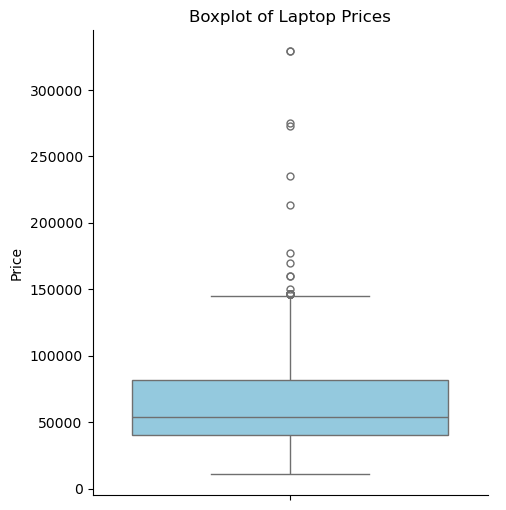

In [189]:
plt.figure(figsize=(8,5))
sns.catplot(data=df1, kind='box', y='Price', color = 'Skyblue')
plt.title("Boxplot of Laptop Prices")
plt.ylabel("Price")
plt.show()


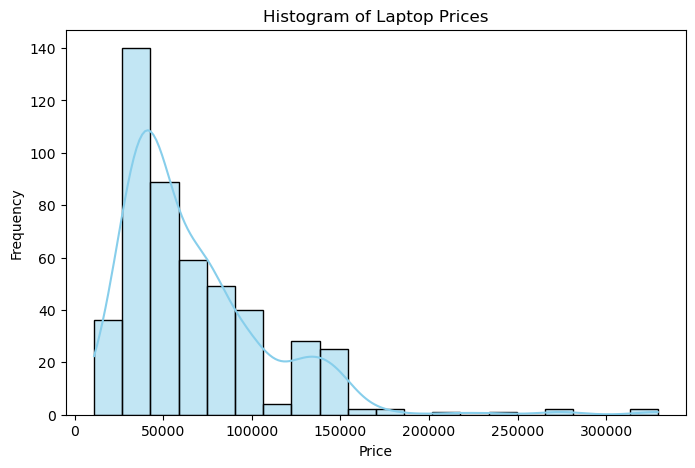

In [138]:
plt.figure(figsize=(8, 5))
sns.histplot(df1['Price'], bins=20, kde=True, color='skyblue')  
plt.title("Histogram of Laptop Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


#### Univariate analysis : Categorical analysis

In [190]:
counts = df1['Brand_names'].value_counts()  # count of the each brand names.
percentages = df1['Brand_names'].value_counts(normalize=True) * 100  # percentage of of brand names wtih value counts.

freq_df = pd.DataFrame({'Count':counts, 'Percentage': percentages})
print(freq_df)


             Count  Percentage
Brand_names                   
HP             223   46.458333
ASUS            62   12.916667
DELL            52   10.833333
Lenovo          51   10.625000
Acer            28    5.833333
MSI             26    5.416667
Apple           18    3.750000
Infinix          6    1.250000
SAMSUNG          4    0.833333
Ultimus          3    0.625000
Thomson          2    0.416667
CHUWI            2    0.416667
Primebook        1    0.208333
GIGABYTE         1    0.208333
walker           1    0.208333


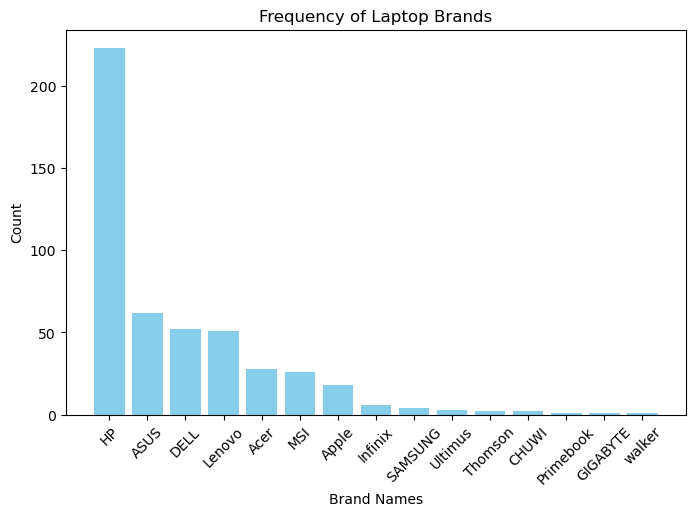

In [154]:
plt.figure(figsize=(8, 5))
plt.bar(counts.index, counts.values, color='skyblue')
plt.xticks(rotation=45)
plt.title("Frequency of Laptop Brands")
plt.xlabel("Brand Names")
plt.ylabel("Count")
plt.show()


 ## Bi-variate Analysis/Multivariate : 



#### 1. Continuous  to Continuous variable  (correlation plot) 

In [161]:
df1.select_dtypes(include='number').columns

Index(['Generation', 'RAM', 'SSD', 'Price', 'Rating'], dtype='object')

In [162]:
corr_mat = df1.select_dtypes(include='number').corr()

In [163]:
corr_mat

,Generation,RAM,SSD,Price,Rating
Generation,1.000000,0.197812,0.086188,0.208824,0.035777
RAM,0.197812,1.000000,0.190845,0.502991,0.263138
SSD,0.086188,0.190845,1.000000,0.064585,0.116024
Price,0.208824,0.502991,0.064585,1.000000,0.395318
Rating,0.035777,0.263138,0.116024,0.395318,1.000000


<Axes: >

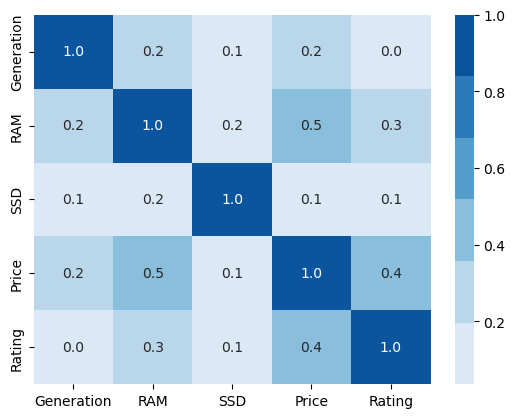

In [167]:
colormap = sns.color_palette("Blues")
sns.heatmap(corr_mat,annot = True,cmap=colormap,fmt='.1f')

#### 2. Continuous and Categorical variables (groupby, pivot table)  

In [193]:
 df1.groupby('Brand_names')['Rating'].mean()

Brand_names
ASUS         4.253226
Acer         4.114286
Apple        4.450000
CHUWI        4.050000
DELL         4.167308
GIGABYTE     4.200000
HP           4.247534
Infinix      4.150000
Lenovo       4.150980
MSI          4.384615
Primebook    4.200000
SAMSUNG      4.600000
Thomson      3.900000
Ultimus      3.833333
walker       3.700000
Name: Rating, dtype: float64

In [196]:
df1.pivot_table(index='Brand_names',values='Rating',aggfunc= 'mean')


,Rating
Brand_names,
ASUS,4.253226
Acer,4.114286
Apple,4.450000
CHUWI,4.050000
DELL,4.167308
GIGABYTE,4.200000
HP,4.247534
Infinix,4.150000
Lenovo,4.150980


#### 3. Categorical to Categorical variables  (crosstab) 

In [185]:
pd.crosstab(df1['Brand_names'], df1['RAM'])


RAM,4,8,12,13,16,24,32
Brand_names,,,,,,,
ASUS,2,22,0,0,36,0,2
Acer,0,11,0,0,17,0,0
Apple,0,0,0,18,0,0,0
CHUWI,0,1,1,0,0,0,0
DELL,1,46,0,0,5,0,0
GIGABYTE,0,0,0,0,1,0,0
HP,2,66,0,0,154,0,1
Infinix,0,0,0,0,5,0,1
Lenovo,1,16,3,0,28,2,1


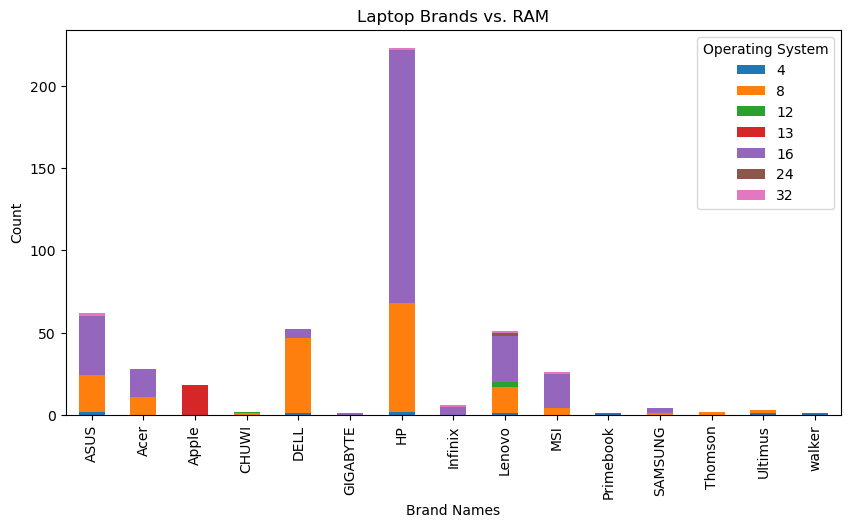

In [191]:
pd.crosstab(df1['Brand_names'], df1['RAM']).plot(kind='bar', stacked = True,figsize=(10, 5))
plt.title("Laptop Brands vs. RAM")
plt.xlabel("Brand Names")
plt.ylabel("Count")
plt.legend(title="Operating System")
plt.show()
